In [17]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as pyplot
 
from weavingspace import WeaveUnit
from weavingspace import TileUnit
from weavingspace import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
dem = gpd.read_file("data/dem-4vars.gpkg")
dem.columns

Index(['elevation', 'shade', 'slope', 'aspect', 'geometry'], dtype='object')

<AxesSubplot:>

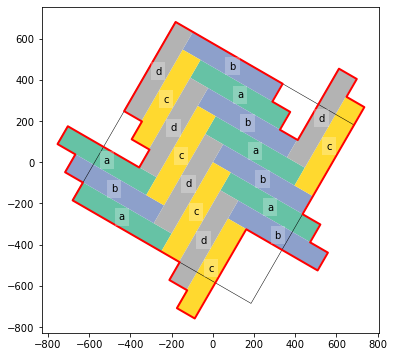

In [12]:
w1 = WeaveUnit(weave_type = "twill", n = 5, spacing = 100, aspect = 1.,
               strands = "ab|cd", crs = dem.crs).transform_rotate(60)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6))

In [13]:
weave = Tiling(w1, dem, id_var = "ID")

id_var is no longer required and will be deprecated soon. A temporary unique index attribute is added and removed when generating the tiled map.


In [14]:
textile = weave.get_tiled_map(# prioritise_tiles = True, ragged_edges = True, 
                                debug = True)

STEP 1: prep data (rotation if requested): 0.014
STEP A2: overlay zones with tiling: 6.474
STEP A3: calculate areas: 0.021
STEP A4: drop columns prior to join: 0.013
STEP A5: build lookup for join: 0.808
STEP A6: perform lookup join: 0.016


In [15]:
textile.variables = ["elevation", "slope", "aspect", "shade"]
textile.colourmaps = dict(zip(textile.variables, 
                              ["terrain", "Reds", "jet", "Greys"] * 4))

Only a list of variables specified, assigning to 
                  available element_ids.


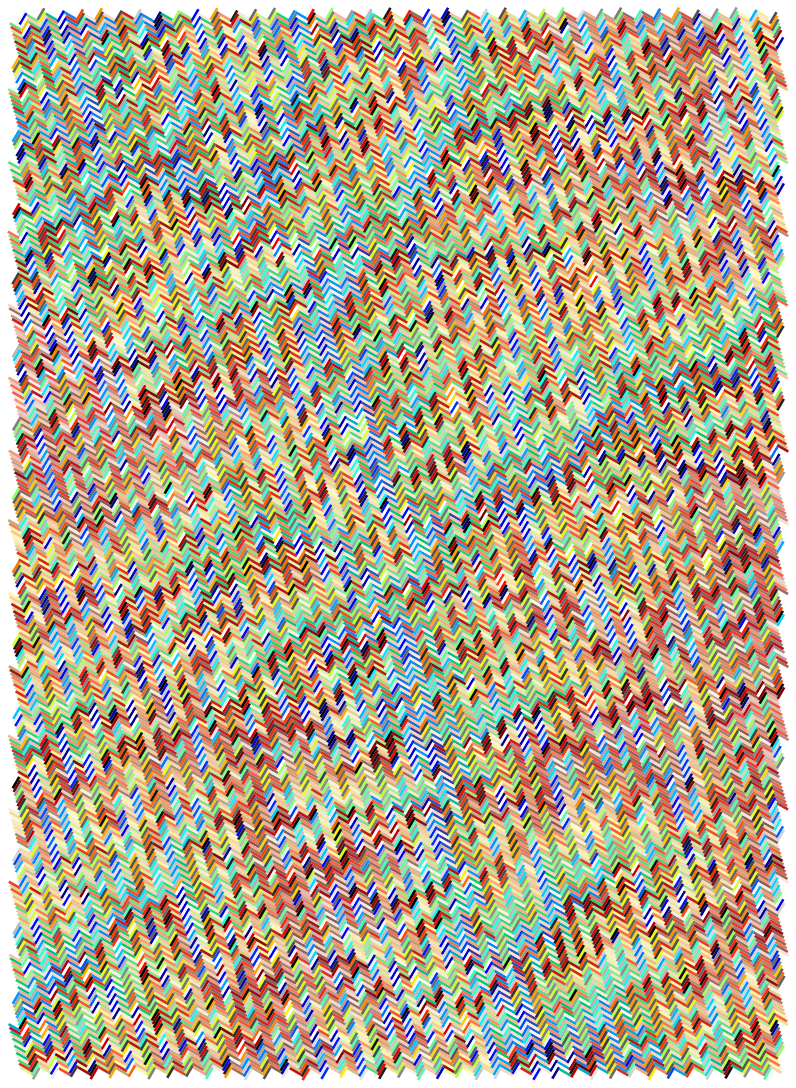

In [16]:
fig = textile.render(legend = False, linewidth = 0)

<AxesSubplot:>

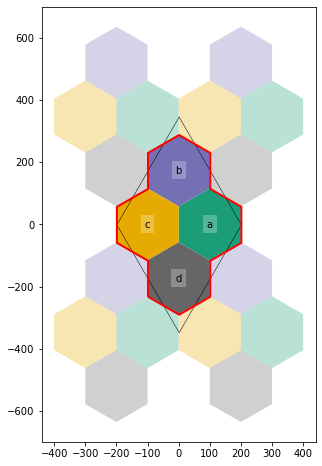

In [33]:
tile_unit = TileUnit(tiling_type = "hex-colouring", n = 4, code = "4.8.8",
                     spacing = 400, crs = dem.crs)#.transform_rotate(-45)
tile_unit.plot(r = 1)

STEP 1: prep data (rotation if requested): 0.013
STEP A2: overlay zones with tiling: 4.306
STEP A3: calculate areas: 0.011
STEP A4: drop columns prior to join: 0.007
STEP A5: build lookup for join: 1.145
STEP A6: perform lookup join: 0.018
Only a list of variables specified, assigning to 
                  available element_ids.


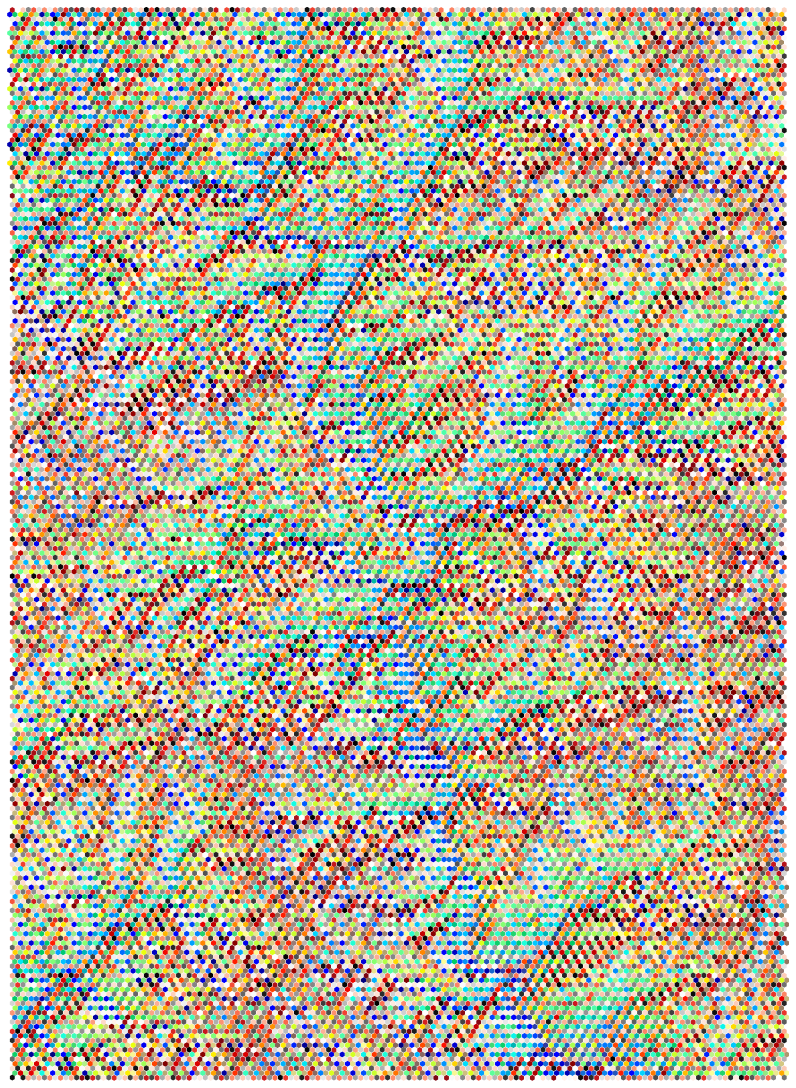

In [34]:
tiling = Tiling(tile_unit, dem, tile_margin = 10)
t = tiling.get_tiled_map(debug = True)
t.variables = ["elevation", "slope", "aspect", "shade"]
t.colourmaps = dict(zip(t.variables,
                        ["terrain", "Reds", "jet", "Greys"] * 4))
fig = t.render(legend = False)